In [2]:
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
from netCDF4 import Dataset
from matplotlib import gridspec
import glob
import cartopy.crs as ccrs
from matplotlib.pyplot import cm
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab



In [4]:
data_control = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/control_20yr.nc')

data_05_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_05_n_20yr.nc')
data_05_s = data_05_n.assign_coords(lat=list(reversed(data_05_n.lat)))

data_05_both=glob.glob("/data/keeling/a/pappup2/a/CESM/cam_05/CESM_output_data/atm/hist/*")
data_05_last18_both=data_05_both[24:240] # Get years 3-20
data_05_data_both = xr.open_mfdataset(data_05_last18_both,combine="by_coords",use_cftime=True)
data_05 = data_05_data_both.mean('time') # Average over the last 18 years


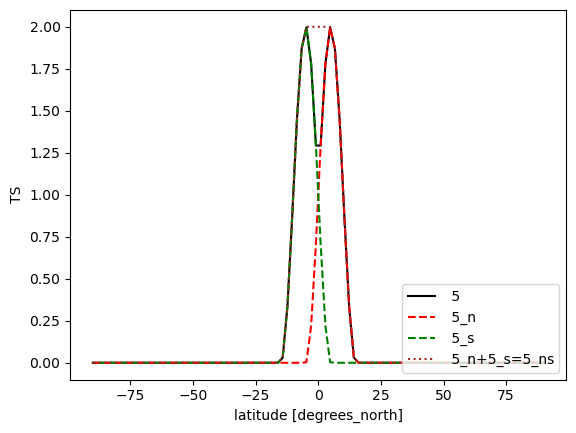

In [32]:
#surface_t2 = surface_t_2.mean('lon')
surface_t1 = data_05.TS.mean('lon')-data_control.TS.mean('lon')
surface_t1.plot(color="black",label=" 5")

surface_t2 = data_05_n.TS.mean('lon')-data_control.TS.mean('lon')
surface_t2.plot(color="red",label=" 5_n",linestyle='dashed')

#plt.plot(x,y,color="green")
surface_t3 =  data_05_s.TS.mean('lon')-data_control.TS.mean('lon')
surface_t3.plot(color="green",label=" 5_s",linestyle='dashed')

surface_t4 =  surface_t2+surface_t3
surface_t4.plot(color="brown",label=" 5_n+5_s=5_ns",linestyle='dotted')
#surface_t2.plot(label="Result of prescribed SST--equatorial band")
plt.legend(loc='lower right')

In [6]:
TOA_flux_exp_minus_control_05_n = (data_05_n.FSNT.mean('lon')-data_05_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_flux_exp_minus_control_05_s = (data_05_s.FSNT.mean('lon')-data_05_s.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_flux_exp_minus_control_05 =(data_05.FSNT.mean('lon')-data_05.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


TOA_flux_exp_minus_control_05_ns=TOA_flux_exp_minus_control_05_n+TOA_flux_exp_minus_control_05_s

pp_05_ns=np.array(TOA_flux_exp_minus_control_05_ns)
#zp= pp.transpose()
exp_05_ns=np.linspace(0,1,96)
plat_05_ns=np.array(TOA_flux_exp_minus_control_05_ns.lat)
expp_05_ns, ppp_05_ns=np.meshgrid(exp_05_ns, pp_05_ns)

pp_05=np.array(TOA_flux_exp_minus_control_05)
#zp= pp.transpose()
exp_05=np.linspace(0,1,96)
plat_05=np.array(TOA_flux_exp_minus_control_05.lat)
expp_05, ppp_05=np.meshgrid(exp_05, pp_05)

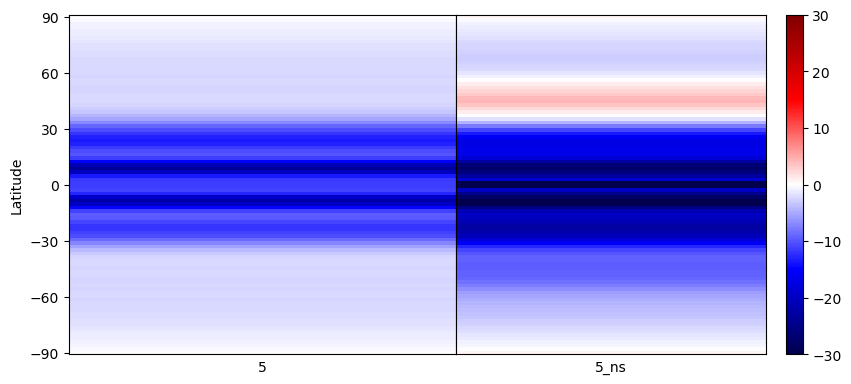

In [7]:

nrow = 1
ncol = 3
fig = plt.figure(figsize=(15, 15))
grid = ImageGrid(fig, 
                 111, # as in plt.subplot(111)
                 nrows_ncols=(nrow,ncol),
                 axes_pad=0,
                 share_all=True,)

#for i in range(1):
#    for j in range(2):
im = np.random.rand(28,28)
gs = gridspec.GridSpec(3, 3)
gs.update(wspace=0)
vmax=30
vmin=-30
plt.subplot(gs[0,0])
plt.pcolormesh(expp_05,plat_05,ppp_05,cmap='seismic',vmax=vmax, vmin=vmin)
plt.yticks(np.arange(-90, 91, 30))
plt.ylabel("Latitude")
plt.xticks([])
plt.xlabel("5")

plt.subplot(gs[0,1])
plt.pcolormesh(expp_05_ns,plat_05_ns,ppp_05_ns,cmap='seismic',vmax=vmax, vmin=vmin)
plt.xticks([])
plt.xlabel("5_ns")
ax = pylab.gca()
ax.yaxis.set_visible(False)



# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,8])
plt.colorbar(shrink=1)
plt.show()

In [8]:
TOA_05_n = (data_05_n.FSNT.mean('lon')-data_05_n.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))
TOA_05_s = (data_05_s.FSNT.mean('lon')-data_05_s.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))

TOA_05_ns=TOA_05_n+TOA_05_s
TOA_05 = (data_05.FSNT.mean('lon')-data_05.FLNT.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FLNT.mean('lon'))


Text(0.5, 1.0, 'TOA flux')

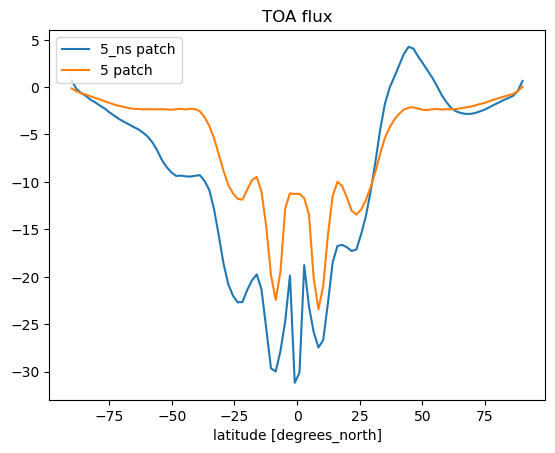

In [9]:

TOA_05_ns.plot( label='5_ns patch')
TOA_05.plot( label='5 patch')

plt.legend(loc='upper left')
plt.title('TOA flux')

In [10]:
Qs_05_n=(-data_05_n.FLNS.mean('lon')+data_05_n.FSNS.mean('lon')-data_05_n.SHFLX.mean('lon')-data_05_n.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))
Qs_05_s=(-data_05_s.FLNS.mean('lon')+data_05_s.FSNS.mean('lon')-data_05_s.SHFLX.mean('lon')-data_05_s.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))

Qs_05_ns=Qs_05_n+Qs_05_s
Qs_05=(-data_05.FLNS.mean('lon')+data_05.FSNS.mean('lon')-data_05.SHFLX.mean('lon')-data_05.LHFLX.mean('lon'))-(-data_control.FLNS.mean('lon')+data_control.FSNS.mean('lon')-data_control.SHFLX.mean('lon')-data_control.LHFLX.mean('lon'))


Text(0.5, 1.0, 'Qs')

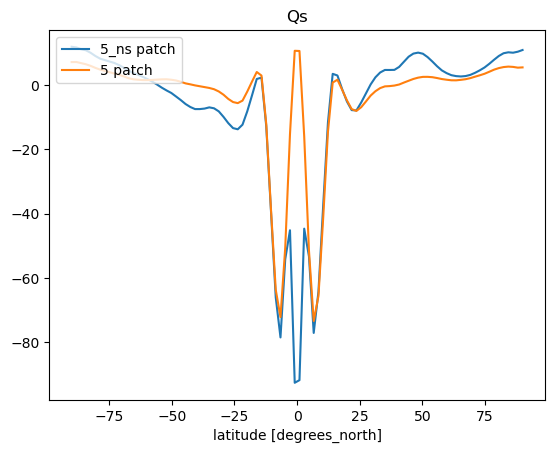

In [11]:
Qs_05_ns.plot( label='5_ns patch')
Qs_05.plot( label='5 patch')

plt.legend(loc='upper left')
plt.title('Qs')

In [12]:
Qa_05_n=Qs_05_n-TOA_05_n
Qa_05_s=Qs_05_s-TOA_05_s

Qa_05_ns=Qa_05_n+Qa_05_s
Qa_05=Qs_05-TOA_05

Text(0.5, 1.0, 'Qa')

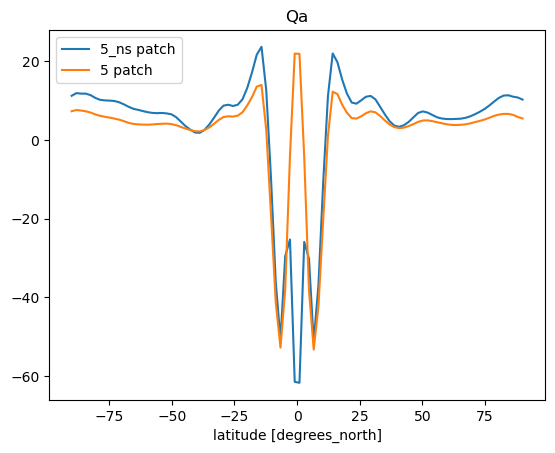

In [13]:
Qa_05_ns.plot( label='5_ns patch')
Qa_05.plot( label='5 patch')

plt.legend(loc='upper left')
plt.title('Qa')

In [14]:
T_05_n=data_05_n.T.mean('lon')-data_control.T.mean('lon')
T_05_s=data_05_s.T.mean('lon')-data_control.T.mean('lon')

T_05_ns=T_05_n+T_05_s
T_05=data_05.T.mean('lon')-data_control.T.mean('lon')


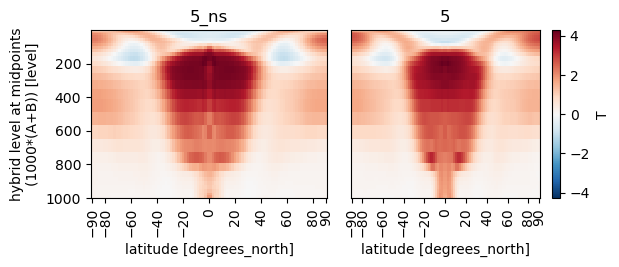

In [15]:
im = np.random.rand(28,28)
gs = gridspec.GridSpec(2, 2)
gs.update(wspace=0.1)

plt.subplot(gs[0,0])
T_05_ns.plot(yincrease=False, cmap='RdBu_r',add_colorbar=False)
#plt.yscale("log")
plt.title('5_ns')
ax = pylab.gca()
plt.xticks([-90, -80, -60,-40,-20,0,20,40,60,80,90])
plt.yticks([1000, 800, 600,400,200])
plt.xticks(rotation=90)

plt.subplot(gs[0,1])
T_05.plot(yincrease=False, cmap='RdBu_r')
#plt.yscale("log")
plt.title('5')
ax = pylab.gca()
ax.yaxis.set_visible(False)
plt.xticks([-90, -80, -60,-40,-20,0,20,40,60,80,90])
plt.xticks(rotation=90)

# Get the current axis
ax = pylab.gca()
# Set Y-axis visibility to False
ax.yaxis.set_visible(False)

#        plt.set_yticklabels([])

#plt.tight_layout() # do not use this!!
#plt.subplot(gs[0,6])
#plt.colorbar()
plt.show()


In [19]:
css_05_n=data_05_n.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')
css_05_s=data_05_s.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')

css_05_ns=css_05_n+css_05_s
css_05=data_05.FSNTC.mean('lon')-data_control.FSNTC.mean('lon')

csl_05_n=data_05_n.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')
csl_05_s=data_05_s.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')

csl_05_ns=csl_05_n+csl_05_s
csl_05=data_05.FLNTC.mean('lon')-data_control.FLNTC.mean('lon')

ass_05_n=data_05_n.FSNT.mean('lon')-data_control.FSNT.mean('lon')
ass_05_s=data_05_s.FSNT.mean('lon')-data_control.FSNT.mean('lon')

ass_05_ns=ass_05_n+ass_05_s
ass_05=data_05.FSNT.mean('lon')-data_control.FSNT.mean('lon')

asl_05_n=data_05_n.FLNT.mean('lon')-data_control.FLNT.mean('lon')
asl_05_s=data_05_s.FLNT.mean('lon')-data_control.FLNT.mean('lon')

asl_05_ns=asl_05_n+asl_05_s
asl_05=data_05.FLNT.mean('lon')-data_control.FLNT.mean('lon')

CRES_05_n = (data_05_n.FSNT.mean('lon')-data_05_n.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))
CRES_05_s = (data_05_s.FSNT.mean('lon')-data_05_s.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))

CRES_05_ns=CRES_05_n+CRES_05_s
CRES_05 = (data_05.FSNT.mean('lon')-data_05.FSNTC.mean('lon'))-(data_control.FSNT.mean('lon')-data_control.FSNTC.mean('lon'))

CREL_05_n = (data_05_n.FLNT.mean('lon')-data_05_n.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))
CREL_05_s = (data_05_s.FLNT.mean('lon')-data_05_s.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))

CREL_05_ns=CREL_05_n+CREL_05_s
CREL_05 = (data_05.FLNT.mean('lon')-data_05.FLNTC.mean('lon'))-(data_control.FLNT.mean('lon')-data_control.FLNTC.mean('lon'))


In [20]:
tcs_05_n=css_05_n-csl_05_n
tcs_05_s=css_05_s-csl_05_s

tcs_05_ns=tcs_05_n+tcs_05_s
tcs_05=css_05-csl_05

tas_05_n=ass_05_n-asl_05_n
tas_05_s=ass_05_s-asl_05_s

tas_05_ns=tas_05_n+tas_05_s
tas_05=ass_05-asl_05

tCRE_05_n=CRES_05_n-CREL_05_n
tCRE_05_s=CRES_05_s-CREL_05_s

tCRE_05_ns=tCRE_05_n+tCRE_05_s
tCRE_05=CRES_05-CREL_05



Text(0.5, 1.0, 'CRES')

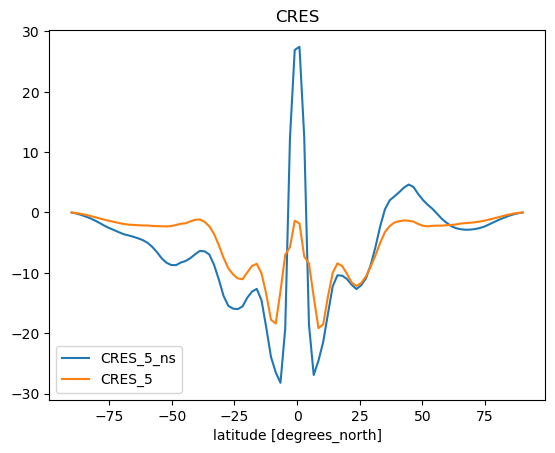

In [21]:


CRES_05_ns.plot(label='CRES_5_ns')
CRES_05.plot(label='CRES_5')


plt.legend(loc='lower left')
plt.title("CRES")

Text(0.5, 1.0, 'CREL')

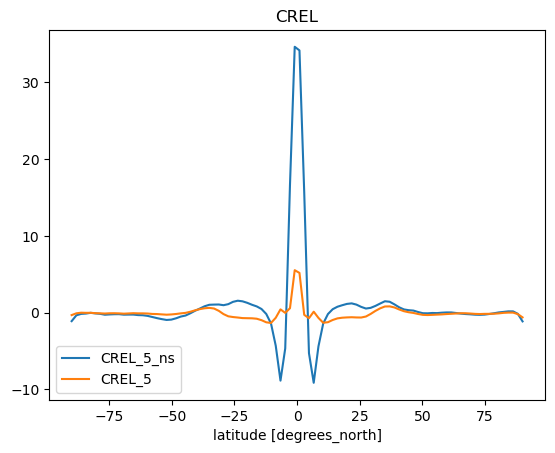

In [23]:
CREL_05_ns.plot(label='CREL_5_ns')
CREL_05.plot(label='CREL_5')


plt.legend(loc='lower left')
plt.title("CREL")

Text(0.5, 1.0, 'Total CRE')

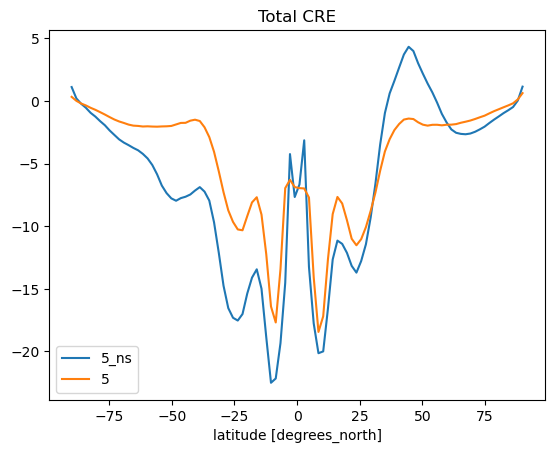

In [24]:
tCRE_05_ns.plot(label='5_ns')
tCRE_05.plot(label='5')


plt.legend(loc='lower left')
plt.title("Total CRE")

Text(0.5, 1.0, 'Total All Sky')

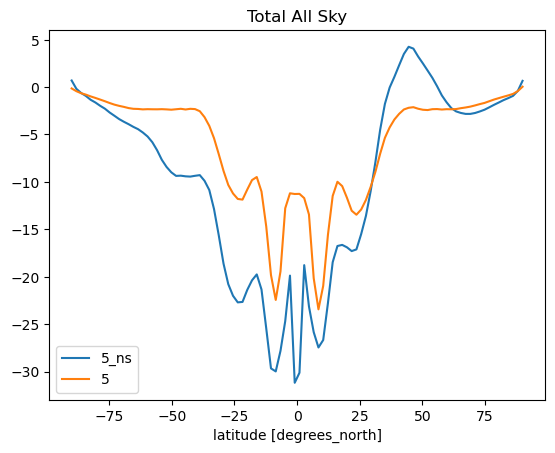

In [25]:
tas_05_ns.plot(label='5_ns')
tas_05.plot(label='5')


plt.legend(loc='lower left')
plt.title("Total All Sky")

Text(0.5, 1.0, 'Total Clear Sky')

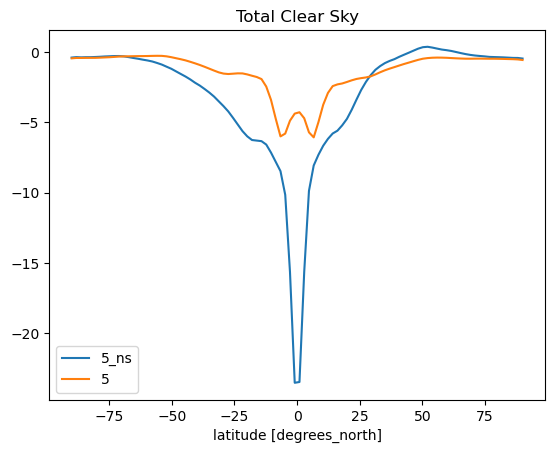

In [26]:
tcs_05_ns.plot(label='5_ns')
tcs_05.plot(label='5')


plt.legend(loc='lower left')
plt.title("Total Clear Sky")